# CLI

## 1.Importing Libraries

In [ ]:
!pip install ultralytics==8.0.0

In [2]:
from IPython.display import Image
import torch

In [3]:
torch.__version__

'2.0.1+cu118'

## 2.Import the Dataset

In [4]:
# Image
!gdown "https://drive.google.com/uc?id=1q-sNrJfUi6PjvT8mFfEw1Cq4eCavdklK&confirm=t"

# Video
!gdown "https://drive.google.com/uc?id=1hl_NNFciFwImmqplL3RkozpiIa8I38cd&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1q-sNrJfUi6PjvT8mFfEw1Cq4eCavdklK&confirm=t
To: /content/image1.jpg
100% 214k/214k [00:00<00:00, 132MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hl_NNFciFwImmqplL3RkozpiIa8I38cd&confirm=t
To: /content/demo.mp4
100% 11.5M/11.5M [00:00<00:00, 41.6MB/s]


## 3.Train the YOLOv8 Model

### Image

In [11]:
!yolo task=segment mode=predict model=yolov8s-seg.pt source='/content/image1.jpg' hide_labels=True hide_conf=True

2023-10-13 20:03:39.638769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 20:03:40.854189: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs
image 1/1 /content/image1.jpg: 448x640 12 persons, 1 bus, 2 traffic lights, 4 backpacks, 5 handbags, 92.3ms
Speed: 0.5ms pre-process, 92.3ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3


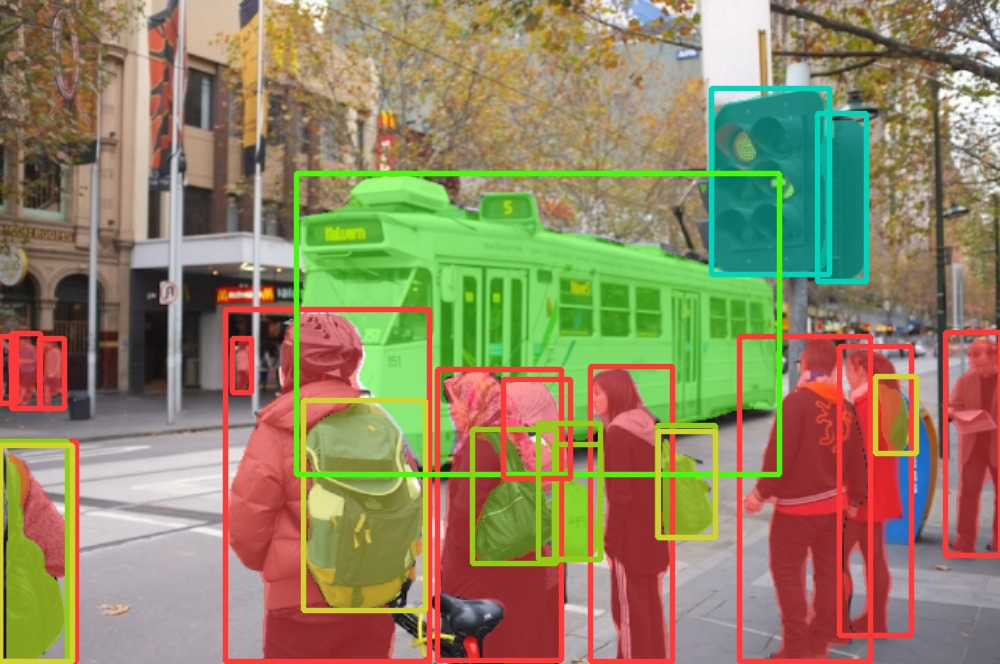

In [17]:
Image('/content/runs/segment/predict2/image1.jpg')

### Video

In [18]:
!yolo task=segment mode=predict model=yolov8s-seg.pt source='/content/demo.mp4'

2023-10-13 20:06:29.794506: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 20:06:30.802862: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs
video 1/1 (1/1314) /content/demo.mp4: 384x640 3 cars, 140.8ms
video 1/1 (2/1314) /content/demo.mp4: 384x640 3 cars, 14.5ms
video 1/1 (3/1314) /content/demo.mp4: 384x640 3 cars, 14.4ms
video 1/1 (4/1314) /content/demo.mp4: 384x640 4 cars, 14.5ms
video 1/1 (5/1314) /content/demo.mp4: 384x640 4 cars, 15.0ms
video 1/1 (6/1314) /content/demo.mp4: 384x640 5 cars, 14.4ms
video 

In [ ]:
# !rm  "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [19]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict4/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

## 4.Export Model in ONNX Format

In [ ]:
!yolo task=segment mode=export model=yolov8s-seg.pt format=onnx

Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Fusing layers... 
YOLOv8s-seg summary: 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

PyTorch: starting from yolov8s-seg.pt with output shape (1, 116, 8400) (22.8 MB)
requirements: YOLOv5 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully unin

# Python

### Image

In [21]:
from ultralytics import YOLO

In [25]:
#Declear a model
model = YOLO("yolov8m-seg.pt")

#Predict
model.predict(source='/content/image1.jpg',  save=True, conf=0.5, save_txt=True, hide_labels=True, hide_conf=True)

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8m-seg summary: 245 layers, 27268704 parameters, 0 gradients, 110.2 GFLOPs
image 1/1 /content/image1.jpg: 448x640 10 persons, 1 train, 2 traffic lights, 1 backpack, 3 handbags, 35.1ms
Speed: 0.4ms pre-process, 35.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict6
1 labels saved to runs/segment/predict6/labels


[[tensor([[0.00000e+00, 4.42000e+02, 7.60000e+01, 6.60000e+02, 5.17649e-01, 0.00000e+00],
          [2.34000e+02, 3.40000e+02, 2.52000e+02, 3.92000e+02, 5.42766e-01, 0.00000e+00],
          [4.00000e+01, 3.37000e+02, 7.20000e+01, 4.06000e+02, 6.14487e-01, 0.00000e+00],
          [5.53000e+02, 4.71000e+02, 5.99000e+02, 5.58000e+02, 6.17270e-01, 2.60000e+01],
          [9.00000e+00, 3.35000e+02, 4.60000e+01, 4.09000e+02, 6.41813e-01, 0.00000e+00],
          [8.06000e+02, 1.16000e+02, 8.66000e+02, 2.81000e+02, 6.44221e-01, 9.00000e+00],
          [6.54000e+02, 4.23000e+02, 7.14000e+02, 5.37000e+02, 6.46318e-01, 2.60000e+01],
          [2.98000e+02, 1.76000e+02, 7.77000e+02, 4.70000e+02, 6.84876e-01, 6.00000e+00],
          [4.72000e+02, 4.26000e+02, 5.55000e+02, 5.64000e+02, 7.18641e-01, 2.60000e+01],
          [8.36000e+02, 3.49000e+02, 9.11000e+02, 6.37000e+02, 8.14479e-01, 0.00000e+00],
          [4.39000e+02, 3.71000e+02, 5.64000e+02, 6.60000e+02, 8.31968e-01, 0.00000e+00],
          

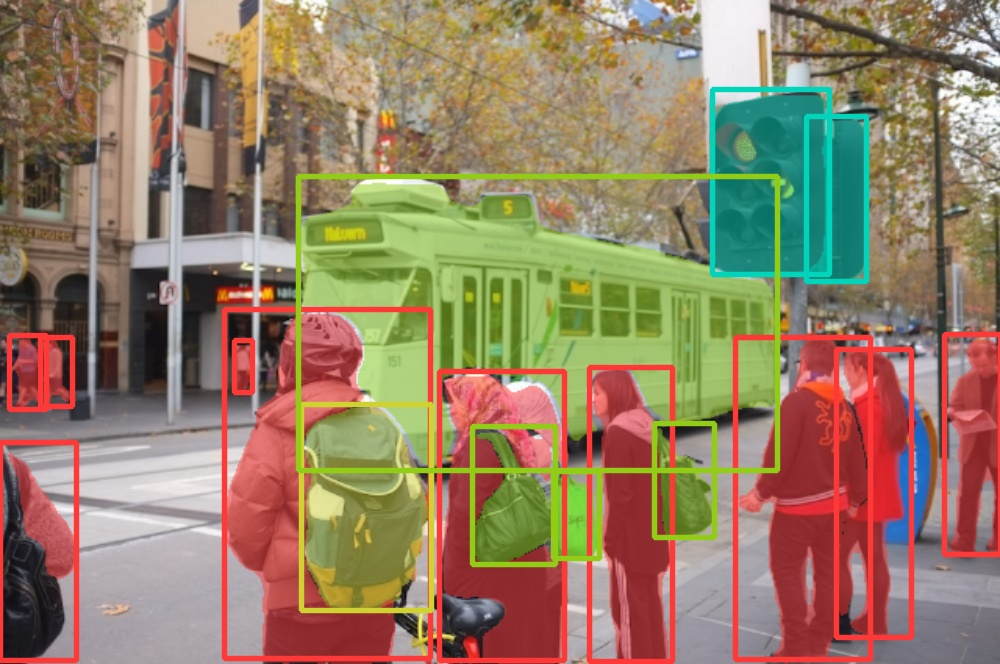

In [27]:
Image('/content/runs/segment/predict6/image1.jpg')

### Video

In [28]:
#Initialize YOLO with the model name
model = YOLO("yolov8m-seg.pt")

#Predict Method Takes all the parameters of the Command Line Interface
model.predict(source='/content/demo.mp4',  save=True, conf=0.5, save_txt = False)

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8m-seg summary: 245 layers, 27268704 parameters, 0 gradients, 110.2 GFLOPs
video 1/1 (1/1314) /content/demo.mp4: 384x640 87.5ms
video 1/1 (2/1314) /content/demo.mp4: 384x640 30.4ms
video 1/1 (3/1314) /content/demo.mp4: 384x640 1 truck, 28.8ms
video 1/1 (4/1314) /content/demo.mp4: 384x640 1 car, 1 truck, 26.0ms
video 1/1 (5/1314) /content/demo.mp4: 384x640 1 car, 26.2ms
video 1/1 (6/1314) /content/demo.mp4: 384x640 1 car, 24.2ms
video 1/1 (7/1314) /content/demo.mp4: 384x640 1 car, 24.0ms
video 1/1 (8/1314) /content/demo.mp4: 384x640 2 cars, 24.0ms
video 1/1 (9/1314) /content/demo.mp4: 384x640 1 car, 24.0ms
video 1/1 (10/1314) /content/demo.mp4: 384x640 1 car, 20.3ms
video 1/1 (11/1314) /content/demo.mp4: 384x640 1 car, 20.3ms
video 1/1 (12/1314) /content/demo.mp4: 384x640 1 car, 20.2ms
video 1/1 (13/1314) /content/demo.mp4: 384x640 1 car, 20.2ms
video 1/1 (14/1314) /content/demo.

[[tensor([[5.68000e+02, 2.88000e+02, 5.91000e+02, 3.19000e+02, 5.27494e-01, 7.00000e+00]], device='cuda:0'),
  tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')],
 [tensor([[5.68000e+02, 2.88000e+02, 5.91000e+02, 3.19000e+02, 5.02731e-01, 7.00000e+00],
          [1.05400e+03, 6.82000e+02, 1.24000e+03, 7.19000e+02, 6.35996e-01, 2.00000e+00]], device='cuda:0'),
  tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
  
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0.,

In [29]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict7/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

Output hidden; open in https://colab.research.google.com to view.

## Export the Model in the onnx Format

In [30]:
#Initialize YOLO with the model name
model = YOLO("yolov8m-seg.pt")
#Export the Model in the onnx format
model.export(format="onnx")

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Fusing layers... 
YOLOv8m-seg summary: 245 layers, 27268704 parameters, 0 gradients, 110.2 GFLOPs

PyTorch: starting from yolov8m-seg.pt with output shape (1, 116, 8400) (52.4 MB)
requirements: YOLOv5 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 63.2 MB/s eta 0:00:00

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.1...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 12.3s, saved as yolov8m-seg.onnx (104.2 MB)

Export complete (17.2s)
Results saved to /content
Predict:         yolo task=segment mode=predict model=yolov8m-seg.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=segment mode=val model=yolov8m-seg.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://netron.app
